# IMPORTER LES PACKAGES NECESSAIRES

In [304]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import warnings
warnings.filterwarnings("ignore")

# CHARGER LE JEU DE DONNEES

In [305]:
series  = pd.read_csv('airpassengers.csv', index_col= 'Month', parse_dates=True)
series

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [306]:
series.columns = ['Number of Passengers']

In [307]:
#afficher les 5 premieres lignes du jeu de donnees
series.head()

,Number of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [308]:
# dimension du jeu de donnees
print(series.size)

144


In [309]:
#rechercher les valeurs manquantes
series.isnull().sum()

Number of Passengers    0
dtype: int64

In [310]:
#Statistiques descriptives
series.describe()

,Number of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


# Visualisation de la série chronologique

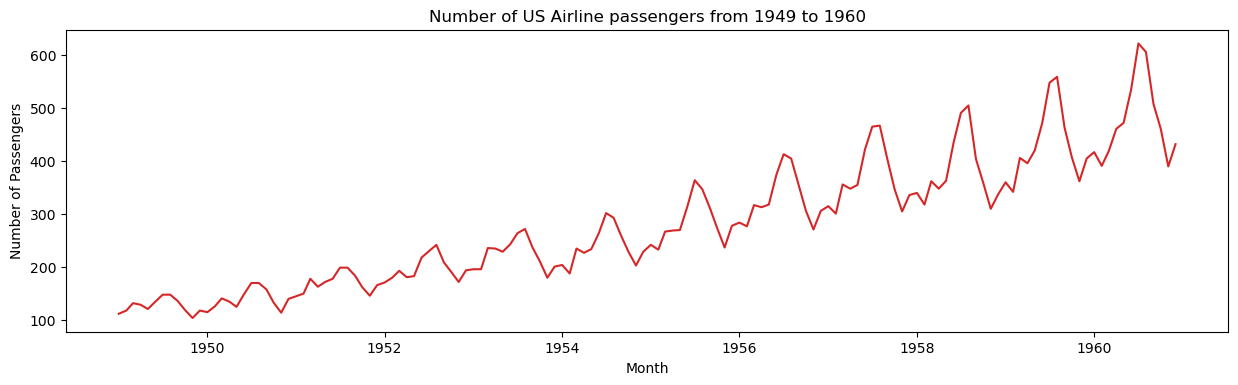

In [312]:
def plot_series(series, x, y, title="", xlabel='Month', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_series(series, x=series.index, y=series['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

Puisque toutes les valeurs sont positives, nous pouvons le montrer des deux côtés de l'axe Y pour souligner la croissance.

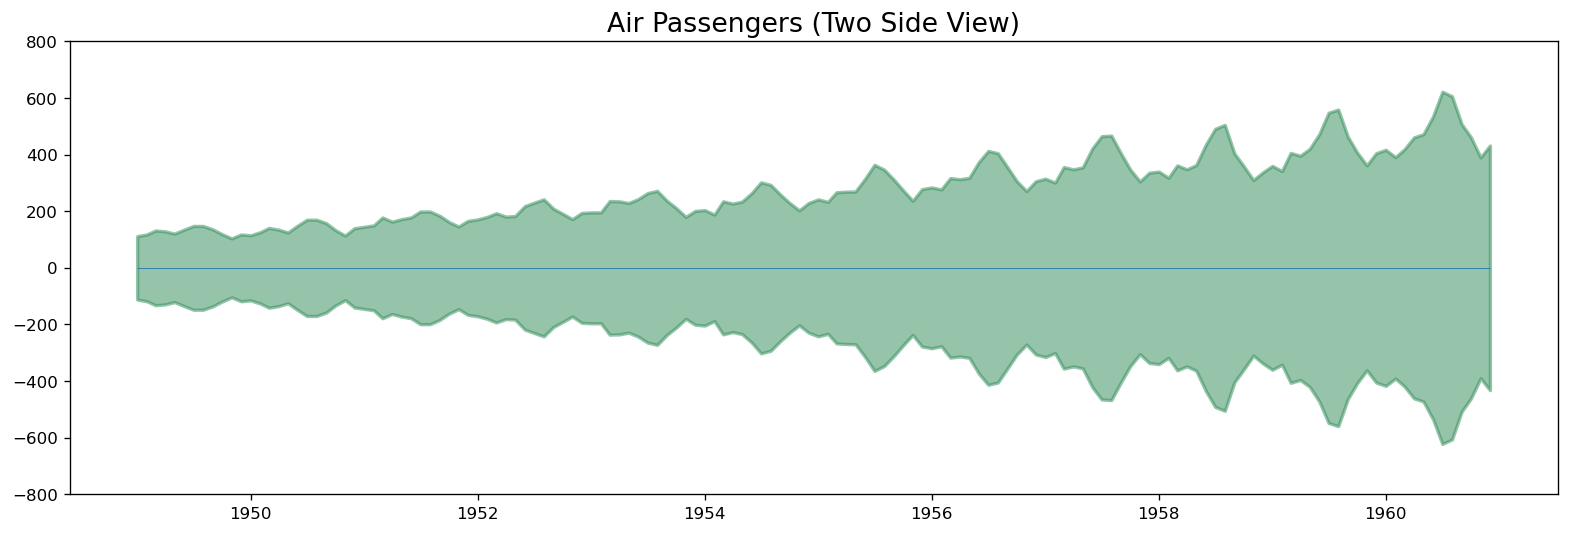

In [315]:
x = series.index.values
y1 = series['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(series.index), xmax=np.max(series.index), linewidth=.5)
plt.show()

On peut voir qu'il s'agit d'une série chronologique mensuelle et qu'elle suit un certain schéma répétitif chaque année. 
Ainsi, nous pouvons tracer chaque année sur une ligne distincte dans le même graphique.
Ceci nous permet de comparer les modèles côte à côte.

# Modèles dans une série chronologique

In [283]:
# LA TENDANCE

Une tendance est observée lorsqu'une pente croissante ou décroissante est observée dans la série chronologique.

In [284]:
#LA Saisonnalité

Une saisonnalité est observée lorsqu'il existe un motif répété distinct observé entre des intervalles réguliers en raison de facteurs saisonniers. Cela peut être dû au mois de l'année, au jour du mois, aux jours de la semaine ou même à l'heure de la journée.

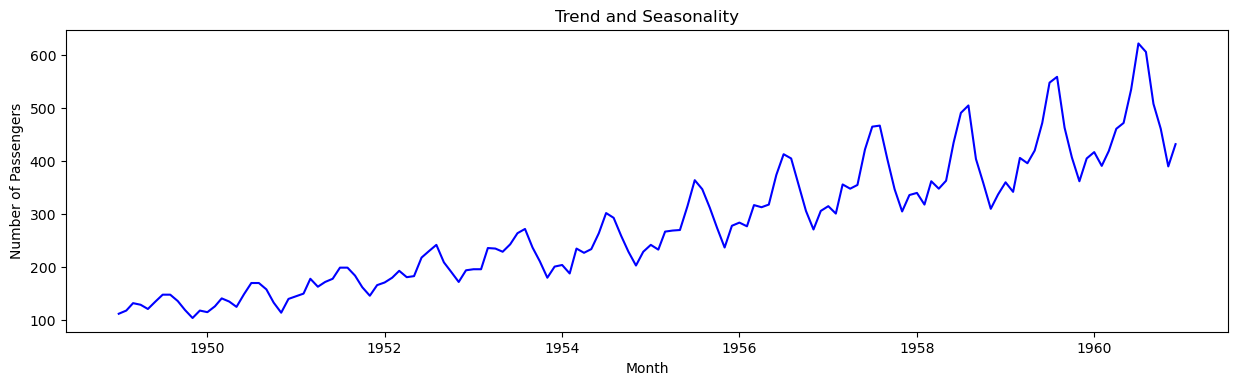

In [316]:
def plot_series(series, x, y, title="", xlabel='Month', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_series(series, x=series.index, y=series['Number of Passengers'], title='Trend and Seasonality')

Comportement cyclique

Une autre chose importante à considérer est le comportement cyclique. Cela se produit lorsque le modèle de hausse
et de baisse de la série ne se produit pas à des intervalles fixes basés sur le calendrier. 
Il ne faut pas confondre effet « cyclique » et effet « saisonnier ».

Si les modèles ne sont pas des fréquences fixes basées sur le calendrier, alors c'est cyclique. 
Parce que, contrairement à la saisonnalité, les effets cycliques sont généralement influencés par l'activité et
d'autres facteurs socio-économiques

# Additive and Multiplicative Time Series 

Nous pouvons avoir différentes combinaisons de tendances et de saisonnalité. Selon la nature des tendances et la saisonnalité, une série chronologique peut être modélisée comme une série chronologique additive ou multiplicative. Chaque observation de la série peut être exprimée sous la forme d'une somme ou d'un produit des composants.

Séries chronologiques additives :

Valeur = Niveau de base + Tendance + Saisonnalité + Erreur
Série chronologique multiplicative :

Valeur = Niveau de base x Tendance x Saisonnalité x Erreur

# Decomposition of a Time Series

La décomposition d'une série chronologique peut être effectuée en considérant la série comme une combinaison additive ou multiplicative du niveau de base, de la tendance, de l'indice saisonnier et du terme résiduel.

Le season_decompose dans statsmodels implémente cela de manière pratique.

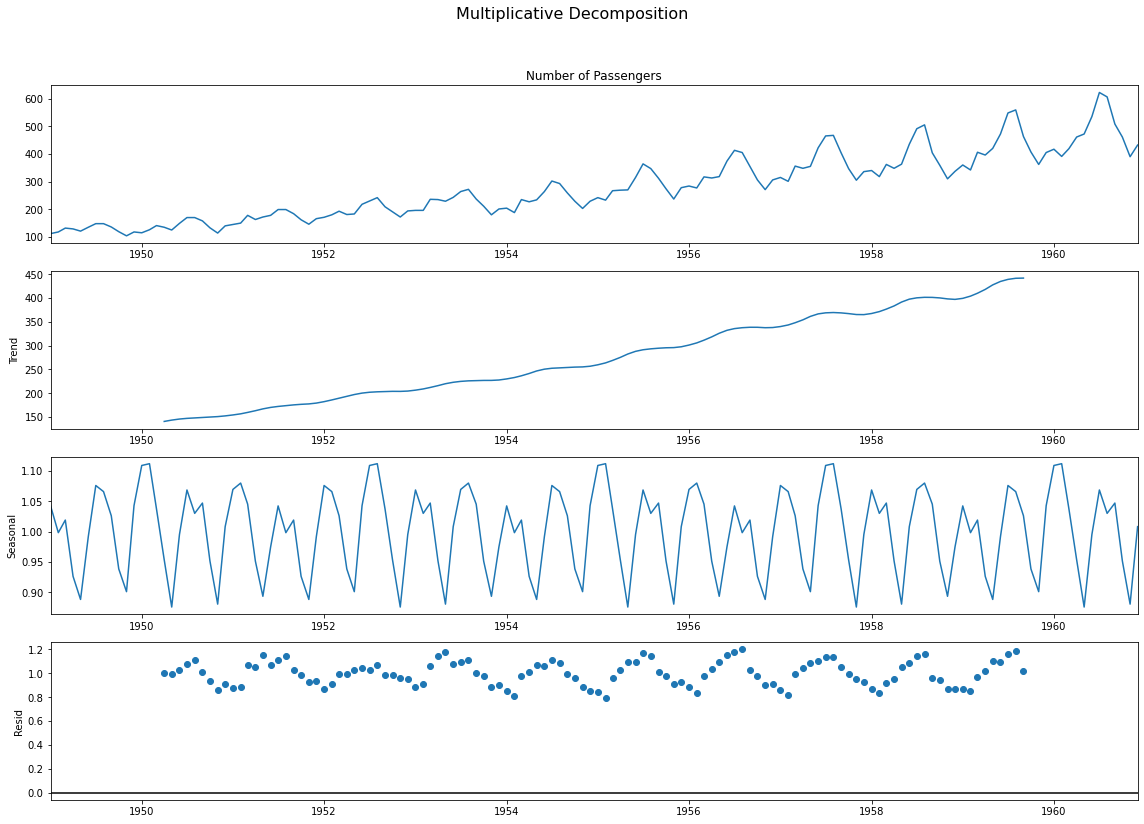

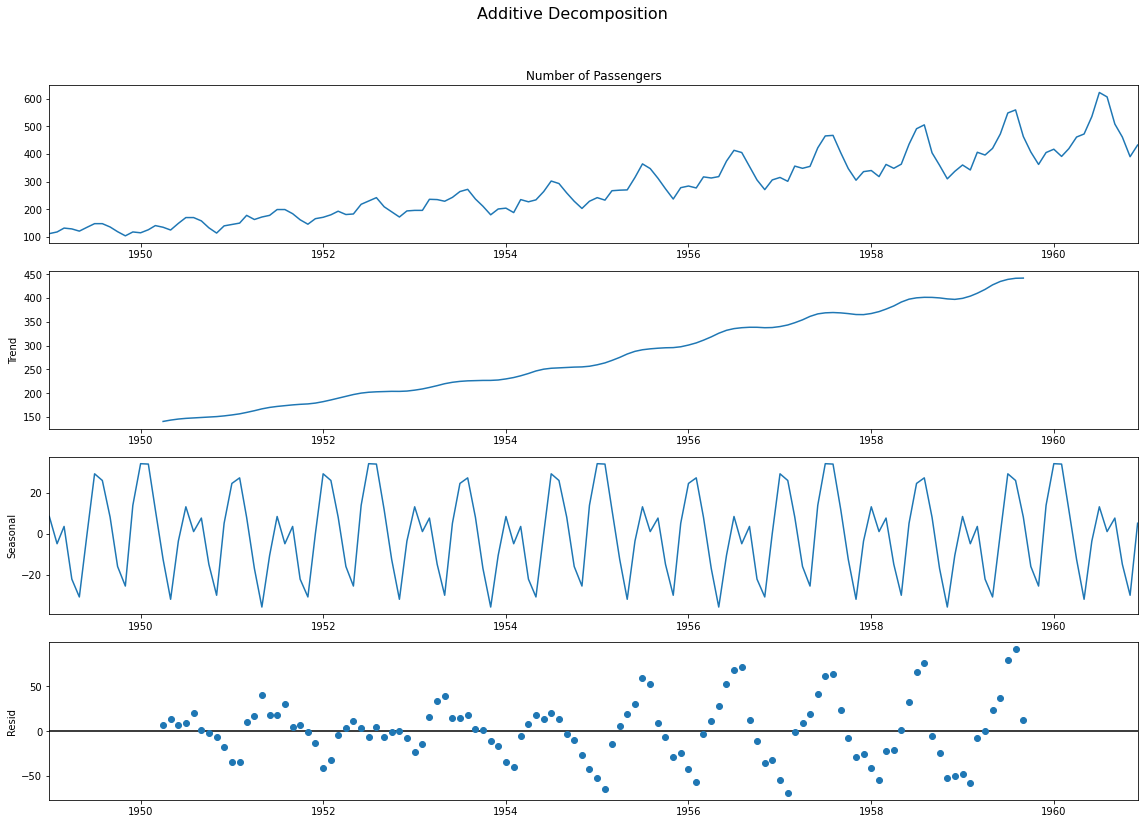

In [317]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(series['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(series['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Si nous examinons de près les résidus de la décomposition additive, il reste un certain schéma.

La décomposition multiplicative semble assez aléatoire, ce qui est bien. Donc, idéalement,
la décomposition multiplicative devrait être préférée pour cette série particulière.